In [43]:
from Bio import SeqIO
import random
import RNA
import statistics

Rna_file = SeqIO.read("/home/mescalin/bioinf2/Downloads/12q22_BAC_RPCI11-256L6.fasta", "fasta")
print(Rna_file)

sequence = str(Rna_file.seq)
sequence_random = [sequence]

for i in range(299):
    sequence_list = list(sequence)
    random.shuffle(sequence_list)
    shuffled_seq = ''.join(sequence_list) 
    sequence_random.append(shuffled_seq)

md = RNA.md()
mfe_values = []

for i, seq in enumerate(sequence_random[:3], 1):
    fc = RNA.fold_compound(seq, md)     
    structure, mfe = fc.mfe() 
    mfe_values.append(mfe)
    print(f"Sequence {i}:")             
    print(f"Seq: {seq[:3]}...")           
    print(f"MFE: {mfe} kcal/mol")
    print(f"Structure: {structure}")   

for seq in sequence_random[3:]:  
    fc = RNA.fold_compound(seq, md)
    structure, mfe = fc.mfe()
    mfe_values.append(mfe)

print(f"\nTotal sequences folded: {len(sequence_random)}")
print(f"Average MFE: {statistics.mean(mfe_values)}")
print(f"Standard Deviation: {statistics.stdev(mfe_values)}")  

ID: AC007298.17:c145366-145295
Name: AC007298.17:c145366-145295
Description: AC007298.17:c145366-145295 Homo sapiens 12q22 BAC RPCI11-256L6 (Roswell Park Cancer Institute Human BAC Library) complete sequence
Number of features: 0
Seq('TCCTCGTTAGTATAGTGGTGAGTATCCCCGCCTGTCACGCGGGAGACCGGGGTT...GAG')
Sequence 1:
Seq: TCC...
MFE: -27.0 kcal/mol
Structure: ((((((((........((.((((..((((((((((...)))))....)))))....)))).)))))))))).
Sequence 2:
Seq: GTC...
MFE: -25.0 kcal/mol
Structure: (((.(((((..(((....)))....))))))))((.(((.(((..((((....))))..))).))).))...
Sequence 3:
Seq: GTC...
MFE: -25.399999618530273 kcal/mol
Structure: ((((((...((.((.(((.(((.(((((.((....)).))))))))..))).))..)).)))))).......

Total sequences folded: 300
Average MFE: -24.5193333530426
Standard Deviation: 3.2184813001228214


In [85]:
test_value = 0.223423462435234
print("{:.2e}".format(test_value))
print(f"{test_value}")

2.23e-01
0.223423462435234


In [40]:
import csv

with open("shuffled_rna.csv", 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["ID", "Sequence", "Structure", "MFE"]) 

    for i in range(0, 300):
        seq = sequence_random[i]
        fc = RNA.fold_compound(seq, md)     
        structure, mfe = fc.mfe() 
        mfe_values.append(mfe)
        writer.writerow([f"sequence_{i}", seq, structure, mfe])


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

mean = statistics.mean(mfe_values)
std = statistics.stdev(mfe_values)
org_data = pd.read_csv("shuffled_rna.csv")
org_mfe = org_data.loc[0, "MFE"]

mfe_values = org_data["MFE"].values
z_scores = stats.zscore(mfe_values)
z_score_first = z_scores[0]

print(z_score_first)

-0.8097335358957275


Text(0.5, 1.0, 'MFE for mononucletide shuffled sequence')

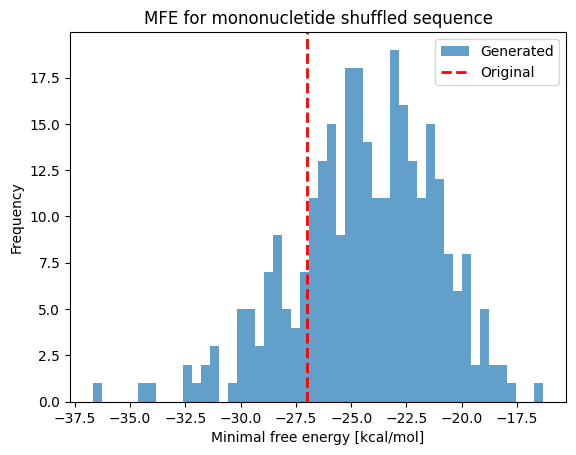

In [67]:
import matplotlib.pyplot as plt

mfe_generated = mfe_values[1:299]
mfe_original = mfe_values[0]

plt.hist(mfe_generated, bins=50, alpha=0.7, label='Generated')
plt.axvline(mfe_original, color='red', linestyle='--', linewidth=2, label='Original')

plt.xlabel('Minimal free energy [kcal/mol]')
plt.ylabel('Frequency')
plt.legend()
plt.title('MFE for mononucletide shuffled sequence')

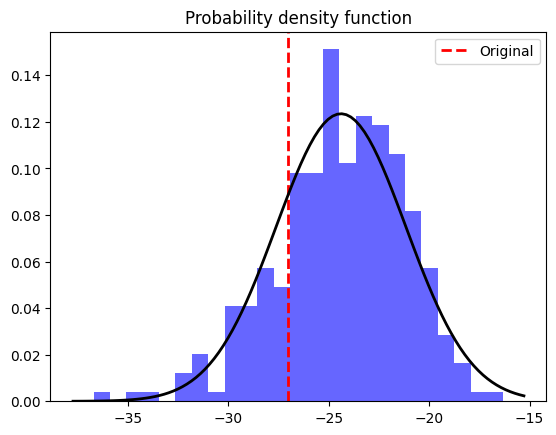

In [97]:
from scipy.stats import norm

mean, std = norm.fit(mfe_values)
plt.hist(mfe_values, bins=25, density=True, alpha=0.6, color='b')
plt.axvline(mfe_original, color='red', linestyle='--', linewidth=2, label='Original')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mean, std)

plt.title('Probability density function')
plt.legend()
plt.show()


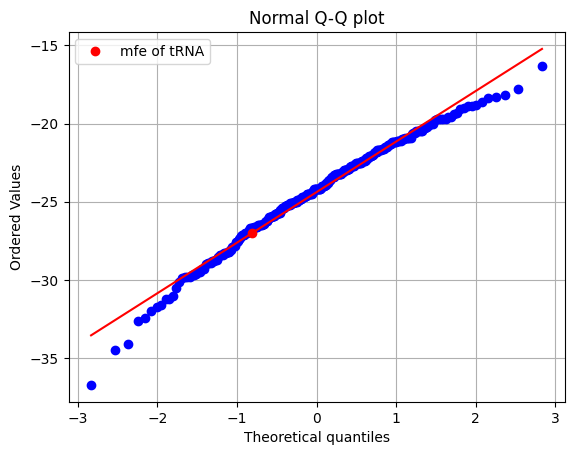

In [80]:
stats.probplot(mfe_values, dist="norm", plot=plt)
plt.plot(z_score_first, mfe_values[0],'ro', label='mfe of tRNA')
plt.title('Normal Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print(f"Probability of getting less than the original Z-value: {stats.norm.cdf(z_score_first)}")

Probability of getting less than the original Z-value: 0.2090466696306788


In [75]:
import varnaapi
v = varnaapi.Structure(sequence=sequence, structure=structure)
v.show()

Output file: /tmp/tmpixv4irsg.svg



JupyterSvgImage(svg='<?xml version="1.0" encoding="UTF-8"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" \n"http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n\n<svg width="366px" height="383.5615330403358px" version="1.1" viewBox="0 0 400 400" \nxmlns="http://www.w3.org/2000/svg">\n<line x1="205.9586777372864" y1="366.0615330403358" x2="205.9586777372864" y2="356.0615330403358" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="205.9586777372864" y1="346.0615330403358" x2="205.9586777372864" y2="336.0615330403358" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="204.86851346273858" y1="326.18182589189956" x2="203.23323877115627" y2="318.8621385856162" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="200.01520153521616" y1="309.4578146953801" x2="195.75945561243154" y2="300.4085812117804" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="191.50370968964697" y1="291.35934772818064" x2="187.24796376686237" y2="282.310114244581" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="180.89875423946629" y1="275.10588603905745" x2="171.4871050150204" y2="269.1315784329132" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="162.2657684490166" y1="266.4519669691896" x2="152.2657684490166" y2="266.4519669691896" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="142.2657684490166" y1="266.4519669691896" x2="132.2657684490166" y2="266.4519669691896" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="122.2657684490166" y1="266.4519669691896" x2="112.2657684490166" y2="266.4519669691896" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="102.2657684490166" y1="266.4519669691896" x2="92.2657684490166" y2="266.4519669691896" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="82.2657684490166" y1="266.4519669691896" x2="72.2657684490166" y2="266.4519669691896" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="63.48318088886808" y1="269.7218341453619" x2="57.34885863393956" y2="275.02466419767325" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="48.598462332470724" y1="278.86099082487596" x2="40.54203555172159" y2="279.7796330933535" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="31.152609896423456" y1="278.0117181386757" x2="23.98195684295726" y2="274.2260014459183" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="17.225965523271306" y1="267.47001012623235" x2="13.440248830513916" y2="260.29935707276616" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="11.672333875836113" y1="250.90993141746802" x2="12.590976144313675" y2="242.8535046367189" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="16.427302771516366" y1="234.10310833525003" x2="21.73013282382763" y2="227.9687860803215" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="25.0" y1="219.18619852017295" x2="25.0" y2="209.18619852017295" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="25.0" y1="199.18619852017295" x2="25.0" y2="189.18619852017295" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="25.0" y1="179.18619852017295" x2="25.0" y2="169.18619852017295" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="25.0" y1="159.18619852017295" x2="25.0" y2="149.18619852017295" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="22.03437692537201" y1="140.16064516948512" x2="17.585939178288164" y2="134.1223108877943" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="14.620316599892739" y1="125.09675753710644" x2="14.620317344242117" y2="117.59675225130013" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="17.58594171414686" y1="108.57119948926788" x2="22.034380659797783" y2="102.53286609056101" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="29.775314536707576" y1="97.02528283863364" x2="36.93828458983683" y2="94.8022355370457" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="44.679218866268684" y1="89.29465257944616" x2